Data Pre-processing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
import tensorflow as tf
print(tf.__version__)


2.19.0


Found 3631 images belonging to 2 classes.


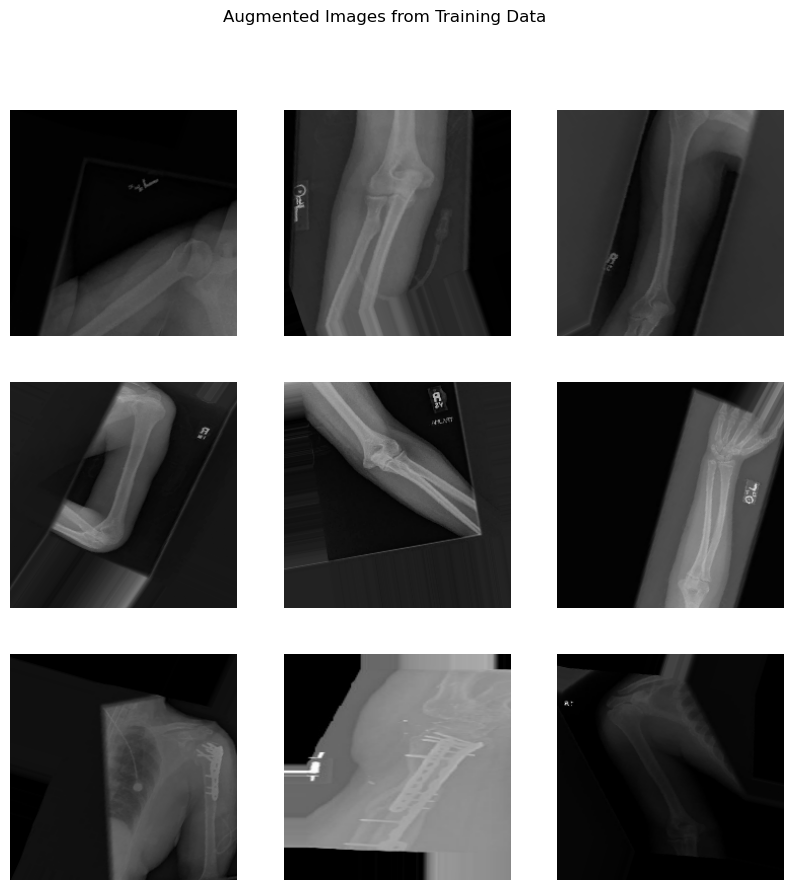

In [3]:
# Define paths (adjust if necessary)
train_dir = "D:\\LMS Sem-4\\CSET-301(AI & ML)\\project\\train"

# Define ImageDataGenerator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

# Create train_generator to load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)
# Display some augmented images from the train_generator
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(9):  
    img, label = next(train_generator)  # Use next() to get a batch
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])  # img is in batch format, so we access img[0]
    plt.axis('off')
plt.suptitle("Augmented Images from Training Data")
plt.show()


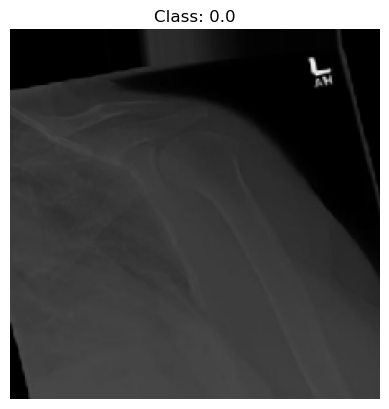

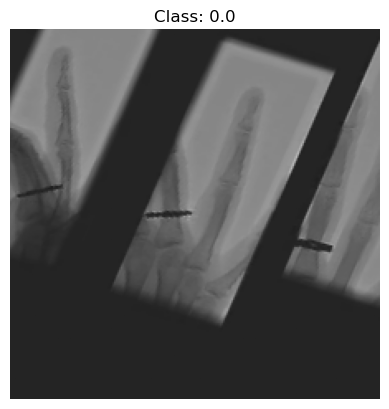

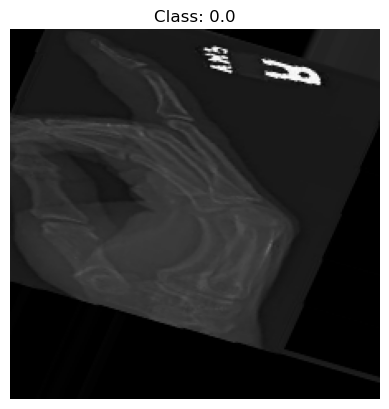

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Display a few images with their class labels
for i in range(3):
    img, label = next(train_generator)  # Use next(train_generator) to get a batch
    plt.imshow(img[0])  # Display the first image in the batch
    plt.title(f"Class: {label[0]}")  # Display the label of the first image
    plt.axis('off')
    plt.show()


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Model Creation - Basic CNN with regularization and batch normalization
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Define paths
train_dir = "D:\\LMS Sem-4\\CSET-301(AI & ML)\\project\\train"
valid_dir = "D:\\LMS Sem-4\\CSET-301(AI & ML)\\project\\valid"
test_dir = "D:\\LMS Sem-4\\CSET-301(AI & ML)\\project\\test"

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=valid_generator
)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 3631 images belonging to 2 classes.
Found 348 images belonging to 2 classes.
Epoch 1/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9636 - loss: 1.1300 - val_accuracy: 1.0000 - val_loss: 0.7393
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.9981 - loss: 0.8357 - val_accuracy: 1.0000 - val_loss: 0.7018
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9991 - loss: 0.7041 - val_accuracy: 1.0000 - val_loss: 0.6603
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9989 - loss: 0.7399 - val_accuracy: 1.0000 - val_loss: 0.7333
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - accuracy: 1.0000 - loss: 0.6583 - val_accuracy: 1.0000 - val_loss: 0.4779
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.9999 - loss: 0.4424 - val_accuracy: 1.0000 - val_loss: 0.4285
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.9999 - loss: 0.3823 - val_accuracy: 1.0000 - val_loss: 0.4099
Epoch 8/10
114